-------------
### ライブラリのインポート

In [31]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# タイピングのサポート
from typing import Optional

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

from matplotlib.ticker import FuncFormatter

plt.style.use("ggplot")

--------------
### 辞書作成

実験設定

In [32]:
TARGET = "GMV"

if TARGET == "GMV":
    X_LIM_VAR = 3e5
    X_TICKS = [2e3, 2e4, 2e5]
    LABELS = ["2e3", "2e4", "2e5"]
if TARGET == "BCR":
    X_LIM_VAR = 3e-3
    X_TICKS = [2e-3, 2e-4, 2e-5]
    LABELS = ["2e-3", "2e-4", "2e-5"]


random_color = "#a9a9a9"
kmeans_p_color = "#f0b87a"
kmeans_o_color = "#c04e33"
once_p_color = "#b87a76"
once_o_color = "#6b1314"

各ファイルからコピペ

In [33]:
dict_100 = {
    "SFS-Kmeans-Var（最適標本配分）": 201116.30582744975,
    "SFS-Kmeans-Var（比例配分）": 210866.79152191014,
    "Kmeans（最適標本配分）": 200541.9069264509,
    "Kmeans（比例配分）": 214872.7562152955,
    "Random": 251461.4056594489,
}
dict_1000 = {
    "SFS-Kmeans-Var（最適標本配分）": 19153.519918735437,
    "SFS-Kmeans-Var（比例配分）": 20822.570433092285,
    "Kmeans（最適標本配分）": 20405.22261162878,
    "Kmeans（比例配分）": 22023.98846487841,
    "Random": 25574.168277427103,
}
dict_10000 = {
    "SFS-Kmeans-Var（最適標本配分）": 1698.4031682560549,
    "SFS-Kmeans-Var（比例配分）": 1922.7697769312188,
    "Kmeans（最適標本配分）": 1834.1735381216324,
    "Kmeans（比例配分）": 1963.3774779141318,
    "Random": 2279.149224402876,
}


In [34]:
def make_var_dict(dict_100, dict_1000, dict_10000) -> dict:
    var_dict = {}
    var_dict["100"] = dict_100
    var_dict["1000"] = dict_1000
    var_dict["10000"] = dict_10000

    return var_dict

In [35]:
var_dict = make_var_dict(dict_100=dict_100, dict_1000=dict_1000, dict_10000=dict_10000)

In [36]:
print(var_dict)

{'100': {'SFS-Kmeans-Var（最適標本配分）': 201116.30582744975, 'SFS-Kmeans-Var（比例配分）': 210866.79152191014, 'Kmeans（最適標本配分）': 200541.9069264509, 'Kmeans（比例配分）': 214872.7562152955, 'Random': 251461.4056594489}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 19153.519918735437, 'SFS-Kmeans-Var（比例配分）': 20822.570433092285, 'Kmeans（最適標本配分）': 20405.22261162878, 'Kmeans（比例配分）': 22023.98846487841, 'Random': 25574.168277427103}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 1698.4031682560549, 'SFS-Kmeans-Var（比例配分）': 1922.7697769312188, 'Kmeans（最適標本配分）': 1834.1735381216324, 'Kmeans（比例配分）': 1963.3774779141318, 'Random': 2279.149224402876}}


C:\Users\HaruMomozu\AppData\Local\Temp\ipykernel_14416\787020256.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


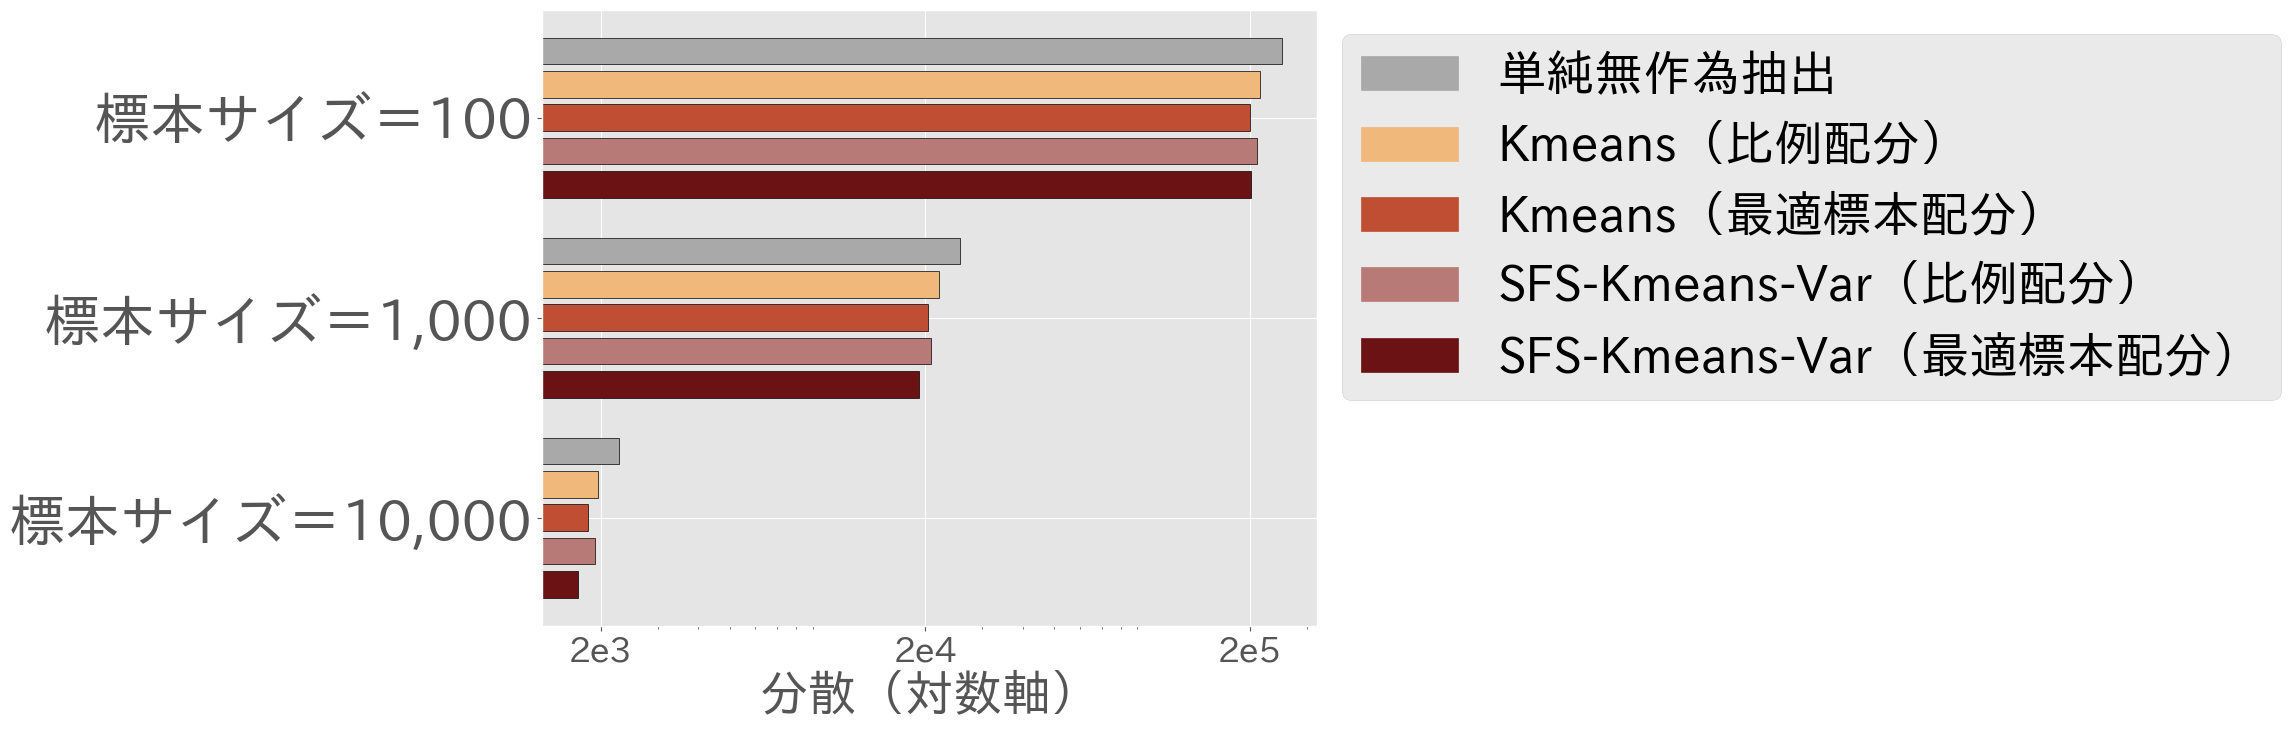

In [37]:
# グラフ用データを準備
labels = [
    "標本サイズ＝10,000",
    "標本サイズ＝1,000",
    "標本サイズ＝100",
]
values = (
    list(var_dict["10000"].values())
    + [0]
    + list(var_dict["1000"].values())
    + [0]
    + list(var_dict["100"].values())
)

# 各グループに色を割り当て、間隔には透明な色を使用
colors = (
    [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
    + ["#FFFFFF00"]
    + [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
    + ["#FFFFFF00"]
    + [once_o_color, once_p_color, kmeans_o_color, kmeans_p_color, random_color]
)

# 各ラベルが3つの棒の真ん中に配置されるように位置を調整
y_positions = [2, 8, 14]

# グラフを描画
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(range(len(values)), values, color=colors, edgecolor="black")

# 凡例の追加
legend_labels = [
    "単純無作為抽出",
    "Kmeans（比例配分）",
    "Kmeans（最適標本配分）",
    "SFS-Kmeans-Var（比例配分）",
    "SFS-Kmeans-Var（最適標本配分）",
]
# 色のリスト
legend_colors = [
    random_color,
    kmeans_p_color,
    kmeans_o_color,
    once_p_color,
    once_o_color,
]
# 各ラベルに対してハンドルを作成
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=35, loc="upper left", bbox_to_anchor=(1, 1))

# y軸の目盛りとラベルを設定
ax.set_yticks(y_positions)
ax.tick_params(axis="x", labelsize=25)
ax.set_yticklabels(labels, fontsize=40)


ax.set_xlabel("分散（対数軸）", fontsize=35)
ax.set_xscale("log")
log_ticks = X_TICKS
ax.set_xscale("log")
ax.set_xticks(log_ticks, labels=LABELS)

plt.tight_layout()
plt.show()

-----------
### 追加の標本サイズの表用

In [38]:
def make_delta_dict(var_dict: dict) -> dict:
    delta_dict = {}
    for sample_size, dict in var_dict.items():
        delta_dict[sample_size] = {}
        for method, var in dict.items():
            if method != "Random":
                delta = format(var_dict[sample_size]["Random"] - var, ".1e")
                delta_dict[sample_size][method] = delta
    return delta_dict


In [39]:
delta_dict = make_delta_dict(var_dict=var_dict)
print(delta_dict)


{'100': {'SFS-Kmeans-Var（最適標本配分）': '5.0e+04', 'SFS-Kmeans-Var（比例配分）': '4.1e+04', 'Kmeans（最適標本配分）': '5.1e+04', 'Kmeans（比例配分）': '3.7e+04'}, '1000': {'SFS-Kmeans-Var（最適標本配分）': '6.4e+03', 'SFS-Kmeans-Var（比例配分）': '4.8e+03', 'Kmeans（最適標本配分）': '5.2e+03', 'Kmeans（比例配分）': '3.6e+03'}, '10000': {'SFS-Kmeans-Var（最適標本配分）': '5.8e+02', 'SFS-Kmeans-Var（比例配分）': '3.6e+02', 'Kmeans（最適標本配分）': '4.4e+02', 'Kmeans（比例配分）': '3.2e+02'}}


In [40]:
def make_additional_size_dict(var_dict: dict) -> tuple[dict, dict]:
    k_dict = {}
    additional_size_dict = {}
    for sample_size, dict in var_dict.items():
        k_dict[sample_size] = {}
        additional_size_dict[sample_size] = {}
        for method, var in dict.items():
            if method != "Random":
                k = var / var_dict[sample_size]["Random"]
                k_dict[sample_size][method] = round(k, 3)
                additional_size = int(sample_size) / k - int(sample_size)
                additional_size_dict[sample_size][method] = round(additional_size, 3)
    return k_dict, additional_size_dict


In [41]:
k_dict, additional_size_dict = make_additional_size_dict(var_dict=var_dict)
print(k_dict)
print(additional_size_dict)


{'100': {'SFS-Kmeans-Var（最適標本配分）': 0.8, 'SFS-Kmeans-Var（比例配分）': 0.839, 'Kmeans（最適標本配分）': 0.798, 'Kmeans（比例配分）': 0.854}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 0.749, 'SFS-Kmeans-Var（比例配分）': 0.814, 'Kmeans（最適標本配分）': 0.798, 'Kmeans（比例配分）': 0.861}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 0.745, 'SFS-Kmeans-Var（比例配分）': 0.844, 'Kmeans（最適標本配分）': 0.805, 'Kmeans（比例配分）': 0.861}}
{'100': {'SFS-Kmeans-Var（最適標本配分）': 25.033, 'SFS-Kmeans-Var（比例配分）': 19.251, 'Kmeans（最適標本配分）': 25.391, 'Kmeans（比例配分）': 17.028}, '1000': {'SFS-Kmeans-Var（最適標本配分）': 335.22, 'SFS-Kmeans-Var（比例配分）': 228.195, 'Kmeans（最適標本配分）': 253.315, 'Kmeans（比例配分）': 161.196}, '10000': {'SFS-Kmeans-Var（最適標本配分）': 3419.365, 'SFS-Kmeans-Var（比例配分）': 1853.469, 'Kmeans（最適標本配分）': 2426.028, 'Kmeans（比例配分）': 1608.309}}


In [42]:
for size, dict in delta_dict.items():
    print(f"[size:{size}]")
    for method, delta in dict.items():
        print(
            f"{method}:delta={delta}, k={k_dict[size][method]}, addi={additional_size_dict[size][method]}"
        )


[size:100]
SFS-Kmeans-Var（最適標本配分）:delta=5.0e+04, k=0.8, addi=25.033
SFS-Kmeans-Var（比例配分）:delta=4.1e+04, k=0.839, addi=19.251
Kmeans（最適標本配分）:delta=5.1e+04, k=0.798, addi=25.391
Kmeans（比例配分）:delta=3.7e+04, k=0.854, addi=17.028
[size:1000]
SFS-Kmeans-Var（最適標本配分）:delta=6.4e+03, k=0.749, addi=335.22
SFS-Kmeans-Var（比例配分）:delta=4.8e+03, k=0.814, addi=228.195
Kmeans（最適標本配分）:delta=5.2e+03, k=0.798, addi=253.315
Kmeans（比例配分）:delta=3.6e+03, k=0.861, addi=161.196
[size:10000]
SFS-Kmeans-Var（最適標本配分）:delta=5.8e+02, k=0.745, addi=3419.365
SFS-Kmeans-Var（比例配分）:delta=3.6e+02, k=0.844, addi=1853.469
Kmeans（最適標本配分）:delta=4.4e+02, k=0.805, addi=2426.028
Kmeans（比例配分）:delta=3.2e+02, k=0.861, addi=1608.309
